# Initialise the libs

In [42]:
import numpy as np
import pandas as pa
import matplotlib.pyplot as plt
from sklearn import linear_model

# load the data

In [6]:
dtype_dict = {'bathrooms':float, 'waterfront':int, 'sqft_above':int, 'sqft_living15':float, 'grade':int,
              'yr_renovated':int, 'price':float, 'bedrooms':float, 'zipcode':str, 'long':float, 'sqft_lot15':float,
              'sqft_living':float, 'floors':str, 'condition':int, 'lat':float, 'date':str, 'sqft_basement':int,
              'yr_built':int, 'id':str, 'sqft_lot':int, 'view':int}

regressionDir = '/home/weenkus/workspace/Machine Learning - University of Washington/Regression'

house = pa.read_csv(regressionDir + '/datasets/kc_house_data.csv', dtype = dtype_dict)
house_test = pa.read_csv(regressionDir + '/datasets/kc_house_test_data.csv', dtype = dtype_dict)
house_train = pa.read_csv(regressionDir + '/datasets/kc_house_train_data.csv', dtype = dtype_dict)

# Explore the data

In [7]:
house.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


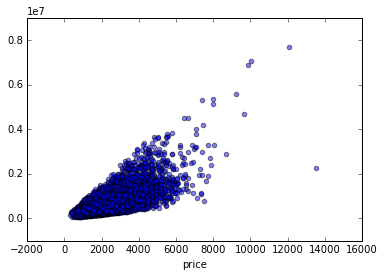

In [8]:
# Show plots in jupyter
%matplotlib inline

plt.scatter(house.sqft_living, house.price, alpha=0.5)
plt.ylabel('')
plt.xlabel('price')
plt.show()

# Add aditional features

In [63]:
house['bedrooms_squared'] = house['bedrooms'].apply(lambda x : x*x)
house_test['bedrooms_squared'] = house_test['bedrooms'].apply(lambda x : x*x)
house_train['bedrooms_squared'] = house_train['bedrooms'].apply(lambda x : x*x)

house['bed_bath_rooms'] = house.apply(lambda x : x['bedrooms'] * x['bathrooms'], axis=1)
house_test['bed_bath_rooms'] = house_test.apply(lambda x : x['bedrooms'] * x['bathrooms'], axis=1)
house_train['bed_bath_rooms'] = house_train.apply(lambda x : x['bedrooms'] * x['bathrooms'], axis=1)

house['log_sqft_living'] = house['sqft_living'].apply(lambda x : np.log(x))
house_test['log_sqft_living'] = house_test['sqft_living'].apply(lambda x : np.log(x))
house_train['log_sqft_living'] = house_train['sqft_living'].apply(lambda x : np.log(x))

house['lat_plus_long'] = house.apply(lambda x : x['lat'] + x['long'], axis=1)
house_test['lat_plus_long'] = house_test.apply(lambda x : x['lat'] + x['long'], axis=1)
house_train['lat_plus_long'] = house_train.apply(lambda x : x['lat'] + x['long'], axis=1)

house.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,bedrooms_squared,bed_bath_rooms,log_sqft_living,lat_plus_long
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1,0,0,...,0,98178,47.5112,-122.257,1340,5650,9,3.00,7.073270,-74.7458
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2,0,0,...,1991,98125,47.7210,-122.319,1690,7639,9,6.75,7.851661,-74.5980
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1,0,0,...,0,98028,47.7379,-122.233,2720,8062,4,2.00,6.646391,-74.4951
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1,0,0,...,0,98136,47.5208,-122.393,1360,5000,16,12.00,7.580700,-74.8722
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1,0,0,...,0,98074,47.6168,-122.045,1800,7503,9,6.00,7.426549,-74.4282


# Calculating the mean of new features

In [64]:
print ('Bedrooms_squared mean: ', np.round(np.mean(house_test['bedrooms_squared']),2))
print ('Bed_sqft_living mean: ', np.round(np.mean(house_test['bed_bath_rooms']),2))
print ('Log_sqft_living mean: ', np.round(np.mean(house_test['log_sqft_living']),2))
print ('Lat_plus_long mean: ', np.round(np.mean(house_test['lat_plus_long']),2))

Bedrooms_squared mean:  12.45
Bed_sqft_living mean:  7.5
Log_sqft_living mean:  7.55
Lat_plus_long mean:  -74.65


# Creater linear Regression models

In [60]:
model1 = linear_model.LinearRegression()
model1_features = house_train[['sqft_living', 'bedrooms', 'bathrooms', 'lat', 'long']]
model1_features_test = house_test[['sqft_living', 'bedrooms', 'bathrooms', 'lat', 'long']]
model1.fit(model1_features, house_train['price'])

model2 = linear_model.LinearRegression()
model2_features = house_train[['sqft_living', 'bedrooms', 'bathrooms', 'lat', 'long', 'bed_bath_rooms']]
model2_features_test = house_test[['sqft_living', 'bedrooms', 'bathrooms', 'lat', 'long', 'bed_bath_rooms']]
model2.fit(model2_features, house_train['price'])

model3 = linear_model.LinearRegression()
model3_features = house_train[['sqft_living', 'bedrooms', 'bathrooms', 'lat', 'long', 'bed_bath_rooms',
                        'bedrooms_squared', 'log_sqft_living', 'lat_plus_long']]
model3_features_test = house_test[['sqft_living', 'bedrooms', 'bathrooms', 'lat', 'long', 'bed_bath_rooms',
                        'bedrooms_squared', 'log_sqft_living', 'lat_plus_long']]
model3.fit(model3_features, house_train['price'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

# Exploring the Regression models

In [48]:
print ('Model1: ', model1.coef_)

Model1:  [  3.12258646e+02  -5.95865332e+04   1.57067421e+04   6.58619264e+05
  -3.09374351e+05]


In [50]:
print ('Model2: ', model2.coef_)

Model2:  [  3.06610053e+02  -1.13446368e+05  -7.14613083e+04   6.54844630e+05
  -2.94298969e+05   2.55796520e+04]


# Computing the RSS of all models

## RSS for the training data

In [58]:
print("Model1 RSS: %.2f" % ((model1.predict(model1_features) - house_train['price']) ** 2).sum())
print("Model2 RSS: %.2f" % ((model2.predict(model2_features) - house_train['price']) ** 2).sum())
print("Model3 RSS: %.2f" % ((model3.predict(model3_features) - house_train['price']) ** 2).sum())

Model1 RSS: 967879963049551.38
Model2 RSS: 958419635074070.62
Model3 RSS: 903436455050479.75


## RSS for the test data

In [62]:
print("Model1 RSS: %.2f" % ((model1.predict(model1_features_test) - house_test['price']) ** 2).sum())
print("Model2 RSS: %.2f" % ((model2.predict(model2_features_test) - house_test['price']) ** 2).sum())
print("Model3 RSS: %.2f" % ((model3.predict(model3_features_test) - house_test['price']) ** 2).sum())

Model1 RSS: 225500469795490.25
Model2 RSS: 223377462976466.56
Model3 RSS: 259236319207176.81
